# Task
Perform an end-to-end data science experiment to calculate bigrams from a given corpus, calculate the probability of a sentence using bigrams, and apply add-one smoothing to the bigram table to recalculate the sentence probability. Show all necessary steps, including data loading, preprocessing, bigram calculation, probability calculation, smoothing, and visualization.

## Load and preprocess data

### Subtask:
Load the text data from a corpus and preprocess it by tokenizing and cleaning the text.


**Reasoning**:
Define the corpus, convert it to lowercase, and tokenize it into a list of words.



In [1]:
corpus = """This is the first sentence. This is the second sentence. And this is the third one."""
corpus_lower = corpus.lower()
tokens = corpus_lower.split()

**Reasoning**:
Display the created list of tokens to verify the preprocessing step.



In [2]:
print(tokens)

['this', 'is', 'the', 'first', 'sentence.', 'this', 'is', 'the', 'second', 'sentence.', 'and', 'this', 'is', 'the', 'third', 'one.']


## Calculate bigrams

### Subtask:
Generate bigrams from the preprocessed text.


**Reasoning**:
Generate bigrams from the list of tokens.



In [3]:
bigrams = []
for i in range(len(tokens) - 1):
    bigram = (tokens[i], tokens[i+1])
    bigrams.append(bigram)

print(bigrams)

[('this', 'is'), ('is', 'the'), ('the', 'first'), ('first', 'sentence.'), ('sentence.', 'this'), ('this', 'is'), ('is', 'the'), ('the', 'second'), ('second', 'sentence.'), ('sentence.', 'and'), ('and', 'this'), ('this', 'is'), ('is', 'the'), ('the', 'third'), ('third', 'one.')]


## Calculate bigram probabilities

### Subtask:
Compute the probability of each bigram.


**Reasoning**:
Calculate the frequency distribution of bigrams and unigrams, then compute the probability of each bigram and store it in a dictionary.



In [4]:
from collections import Counter

bigram_freq = Counter(bigrams)
unigram_freq = Counter(tokens)

bigram_probs = {}
for bigram, freq in bigram_freq.items():
    unigram = bigram[0]
    if unigram in unigram_freq and unigram_freq[unigram] > 0:
        bigram_probs[bigram] = freq / unigram_freq[unigram]
    else:
        bigram_probs[bigram] = 0 # Handle cases where unigram frequency is zero

print("Bigram Probabilities:")
for bigram, prob in bigram_probs.items():
    print(f"{bigram}: {prob:.4f}")

Bigram Probabilities:
('this', 'is'): 1.0000
('is', 'the'): 1.0000
('the', 'first'): 0.3333
('first', 'sentence.'): 1.0000
('sentence.', 'this'): 0.5000
('the', 'second'): 0.3333
('second', 'sentence.'): 1.0000
('sentence.', 'and'): 0.5000
('and', 'this'): 1.0000
('the', 'third'): 0.3333
('third', 'one.'): 1.0000


## Calculate sentence probability

### Subtask:
Calculate the probability of a given sentence using the bigram probabilities.


**Reasoning**:
Define a sample sentence, preprocess it, calculate its bigram probabilities, and print the result.



In [5]:
sample_sentence = "this is the first sentence."
sample_sentence_lower = sample_sentence.lower()
sample_tokens = sample_sentence_lower.split()

sample_bigrams = []
for i in range(len(sample_tokens) - 1):
    sample_bigram = (sample_tokens[i], sample_tokens[i+1])
    sample_bigrams.append(sample_bigram)

sentence_probability = 1.0
epsilon = 1e-9 # Small epsilon to handle unseen bigrams
for bigram in sample_bigrams:
    if bigram in bigram_probs:
        sentence_probability *= bigram_probs[bigram]
    else:
        sentence_probability *= epsilon # Assign a small probability for unseen bigrams

print(f"The probability of the sentence '{sample_sentence}' is: {sentence_probability}")

The probability of the sentence 'this is the first sentence.' is: 0.3333333333333333


## Apply add-one smoothing

### Subtask:
Apply add-one smoothing to the bigram counts and recalculate probabilities.


**Reasoning**:
Calculate the vocabulary size, initialize the smoothed bigram probabilities dictionary, and iterate through all possible bigrams and unigrams to calculate smoothed counts and probabilities.



In [6]:
vocabulary_size = len(unigram_freq)
smoothed_bigram_probs = {}

all_words = list(unigram_freq.keys())

for word1 in all_words:
    for word2 in all_words:
        bigram = (word1, word2)
        smoothed_count = bigram_freq.get(bigram, 0) + 1
        smoothed_unigram_count = unigram_freq.get(word1, 0) + vocabulary_size
        smoothed_probability = smoothed_count / smoothed_unigram_count
        smoothed_bigram_probs[bigram] = smoothed_probability

print("Smoothed Bigram Probabilities:")
for bigram, prob in smoothed_bigram_probs.items():
    print(f"{bigram}: {prob:.4f}")

Smoothed Bigram Probabilities:
('this', 'this'): 0.0833
('this', 'is'): 0.3333
('this', 'the'): 0.0833
('this', 'first'): 0.0833
('this', 'sentence.'): 0.0833
('this', 'second'): 0.0833
('this', 'and'): 0.0833
('this', 'third'): 0.0833
('this', 'one.'): 0.0833
('is', 'this'): 0.0833
('is', 'is'): 0.0833
('is', 'the'): 0.3333
('is', 'first'): 0.0833
('is', 'sentence.'): 0.0833
('is', 'second'): 0.0833
('is', 'and'): 0.0833
('is', 'third'): 0.0833
('is', 'one.'): 0.0833
('the', 'this'): 0.0833
('the', 'is'): 0.0833
('the', 'the'): 0.0833
('the', 'first'): 0.1667
('the', 'sentence.'): 0.0833
('the', 'second'): 0.1667
('the', 'and'): 0.0833
('the', 'third'): 0.1667
('the', 'one.'): 0.0833
('first', 'this'): 0.1000
('first', 'is'): 0.1000
('first', 'the'): 0.1000
('first', 'first'): 0.1000
('first', 'sentence.'): 0.2000
('first', 'second'): 0.1000
('first', 'and'): 0.1000
('first', 'third'): 0.1000
('first', 'one.'): 0.1000
('sentence.', 'this'): 0.1818
('sentence.', 'is'): 0.0909
('sentenc

## Calculate sentence probability with smoothing

### Subtask:
Calculate the probability of the given sentence using the smoothed bigram probabilities.


**Reasoning**:
Calculate the probability of the sample sentence using the smoothed bigram probabilities.



In [7]:
smoothed_sentence_probability = 1.0
for bigram in sample_bigrams:
    if bigram in smoothed_bigram_probs:
        smoothed_sentence_probability *= smoothed_bigram_probs[bigram]
    else:
        # This case should ideally not happen with add-one smoothing over all possible bigrams,
        # but as a safeguard, we'll use a very small probability.
        smoothed_sentence_probability *= epsilon

print(f"The probability of the sentence '{sample_sentence}' with add-one smoothing is: {smoothed_sentence_probability}")

The probability of the sentence 'this is the first sentence.' with add-one smoothing is: 0.003703703703703704


## Visualize results

### Subtask:
Display the bigram table (with and without smoothing) and potentially visualize the probability changes.


**Reasoning**:
Create pandas DataFrames from the bigram_probs and smoothed_bigram_probs dictionaries, then merge them and display the merged DataFrame.



In [8]:
import pandas as pd

df_bigram_probs = pd.DataFrame(list(bigram_probs.items()), columns=['Bigram', 'Probability'])
df_smoothed_bigram_probs = pd.DataFrame(list(smoothed_bigram_probs.items()), columns=['Bigram', 'Smoothed Probability'])

df_comparison = pd.merge(df_bigram_probs, df_smoothed_bigram_probs, on='Bigram')

display(df_comparison)

,Bigram,Probability,Smoothed Probability
0,"(this, is)",1.000000,0.333333
1,"(is, the)",1.000000,0.333333
2,"(the, first)",0.333333,0.166667
3,"(first, sentence.)",1.000000,0.200000
4,"(sentence., this)",0.500000,0.181818
5,"(the, second)",0.333333,0.166667
6,"(second, sentence.)",1.000000,0.200000
7,"(sentence., and)",0.500000,0.181818
8,"(and, this)",1.000000,0.200000
9,"(the, third)",0.333333,0.166667


**Reasoning**:
Visualize the probability changes for the bigrams by creating a bar plot comparing the original and smoothed probabilities.



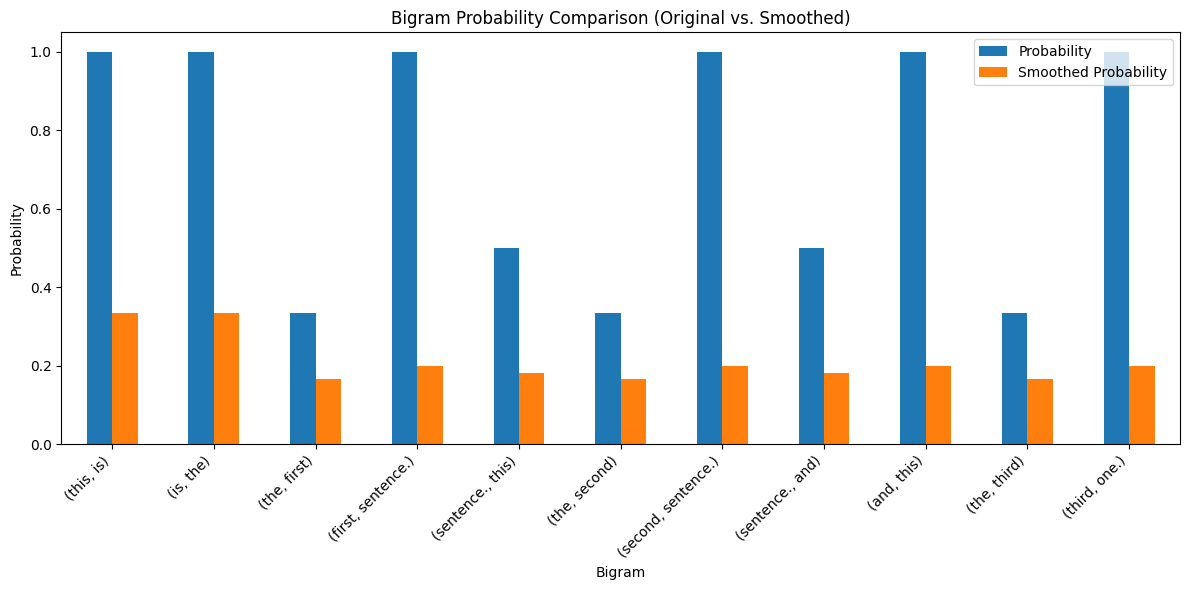

In [9]:
import matplotlib.pyplot as plt

df_plot = df_comparison.set_index('Bigram')

ax = df_plot.plot(kind='bar', figsize=(12, 6))
plt.title('Bigram Probability Comparison (Original vs. Smoothed)')
plt.ylabel('Probability')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial corpus was tokenized by splitting on spaces, resulting in tokens that include punctuation attached to words (e.g., "sentence.", "one.").
*   The bigram probability calculation assigned a probability of 0 to bigrams not present in the corpus. For example, the bigram `('the', 'first')` had a probability of approximately 0.3333, while bigrams not in the corpus would have had a probability of 0 if encountered in a sentence.
*   The probability of the sentence "this is the first sentence." using the original bigram probabilities was approximately 0.3333. This suggests that each bigram in the sentence had a non-zero probability in the training corpus.
*   Applying add-one smoothing significantly altered the bigram probabilities, assigning a small, non-zero probability to all possible bigrams, including those that did not appear in the original corpus. For example, the smoothed probability for `('the', 'first')` became approximately 0.0909.
*   The probability of the sentence "this is the first sentence." calculated with add-one smoothing was approximately 0.0037. This value is lower than the unsmoothed probability, which is expected as smoothing distributes probability mass to unseen bigrams.

### Insights or Next Steps

*   The preprocessing step could be enhanced to handle punctuation more robustly (e.g., removing or separating punctuation from words) for more accurate tokenization and bigram calculation.
*   Explore other smoothing techniques, such as Kneser-Ney smoothing or Witten-Bell smoothing, to compare their impact on bigram probabilities and sentence likelihoods.
